<a href="https://www.kaggle.com/code/utsavmaji/water-index-prediction?scriptVersionId=190988478" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predicting Water Index in India

Let's predict the water index. This will help India take necessary measures to prevent water scarcity and optimize water allocation for sustainable water management.

## Models to be Trained

In this Kaggle Notebook, I will train the following models to solve this regression problem:

1. **Linear Regression**
2. **Lasso** (Linear Regression with L1 Regularization)
3. **Ridge** (Linear Regression with L2 Regularization)
4. **Elastic Net**
5. **Support Vector Regression**
6. **Random Forest Regressor**
7. **XGBoost**
8. **LSTM**

## Evaluation Metrics

Following with hyperparameter tuning, we will judge model's testing and training performance based on the following metrics:

- **Mean Squared Error (MSE)**
- **Mean Absolute Error (MAE)**
- **R² Score**


Here I will follow this flow to solve this problem
## Data Cleaning -> Data Visualization -> Data Preprocessing -> Model Training -> Exporting Model -> Conclusion

## Let's Import the necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

2024-07-30 15:10:56.199019: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 15:10:56.199137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 15:10:56.340461: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Let's Go through the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/india-state-level-water-stress-index-dataset/Water Stress2.csv")
df.head()

,State Name,State area ( Km^2),Year,State Population,Total Water Storage in Reservoirs(mcm),Groundwater Level(mbgl),Total Water Demand(BCM),Rain Water(mm),Population Density(per Km^2),Water Stress Index
0,Andhra Pradesh,"162,975",2023,"101,024,395","8,021",11.07,49.0,151.5,619.876638,9.952877
1,Andhra Pradesh,"162,975",2022,99734221,"7,539",10.97,48.5,575.5,611.960245,8.622313
2,Andhra Pradesh,"162,975",2021,98449661,"7,742",7.57,48.0,1095.7,604.078300,8.717334
3,Andhra Pradesh,"162,975",2020,97170395,"7,911",6.81,47.5,370.3,596.228839,8.364753
4,Andhra Pradesh,"162,975",2019,95896435,"7,451",11.20,47.0,790.7,588.411934,9.092267


In [3]:
df.describe()

,Year,Groundwater Level(mbgl),Total Water Demand(BCM),Population Density(per Km^2),Water Stress Index
count,504.000000,504.000000,504.000000,504.000000,504.000000
mean,2016.500000,8.474975,17.834603,1333.923233,3.878838
std,4.035134,7.641005,19.726101,3331.950335,4.133781
min,2010.000000,0.400000,0.040000,13.111162,0.017806
25%,2013.000000,4.340000,1.477500,188.778590,0.534972
50%,2016.500000,6.030000,9.700000,368.460298,2.224460
75%,2020.000000,9.935000,30.925000,859.191030,6.784195
max,2023.000000,60.490000,79.800000,22197.439350,18.999209


I am making a copy of State Names as we will be requiring it later in this notebook

In [4]:
df_States = df['State Name']
df_States

0       Andhra Pradesh
1       Andhra Pradesh
2       Andhra Pradesh
3       Andhra Pradesh
4       Andhra Pradesh
            ...       
499    Puducherry (UT)
500    Puducherry (UT)
501    Puducherry (UT)
502    Puducherry (UT)
503    Puducherry (UT)
Name: State Name, Length: 504, dtype: object

# Data Cleaning 

Let's First remove any Empty cell

In [5]:
df.isnull().sum()

State Name                                0
State area   ( Km^2)                      0
Year                                      0
State Population                          0
Total Water Storage in Reservoirs(mcm)    0
Groundwater Level(mbgl)                   0
Total Water Demand(BCM)                   0
Rain Water(mm)                            1
Population Density(per Km^2)              0
Water Stress Index                        0
dtype: int64

In [6]:
# Some of the data got comma(,), we have to clean this
cols = df.columns
for col in cols:
    try:
        df[col] = df[col].str.replace(',', '').astype(float)
    except:
        pass
    
#  We got one column with empty cell, Let's solve that
med = df['Rain Water(mm)'].median()
med = math.floor(med)
df['Rain Water(mm)'] = df['Rain Water(mm)'].fillna(med)

# Data Visualiation

# Data Preprocessing

## Step 1: We will first encode the State Name column using Label Encoder
Though One Hot Encoding can also be used, but it will increase Dataset Dimensionality though
So I am avoiding it to save time as I will do Hyperparameter tuning

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
df['State Name'] = le.fit_transform(df['State Name'])
df

,State Name,State area ( Km^2),Year,State Population,Total Water Storage in Reservoirs(mcm),Groundwater Level(mbgl),Total Water Demand(BCM),Rain Water(mm),Population Density(per Km^2),Water Stress Index
0,1,162975.0,2023,101024395.0,8021.00,11.07,49.00,151.500000,619.876638,9.952877
1,1,162975.0,2022,99734221.0,7539.00,10.97,48.50,575.500000,611.960245,8.622313
2,1,162975.0,2021,98449661.0,7742.00,7.57,48.00,1095.700000,604.078300,8.717334
3,1,162975.0,2020,97170395.0,7911.00,6.81,47.50,370.300000,596.228839,8.364753
4,1,162975.0,2019,95896435.0,7451.00,11.20,47.00,790.700000,588.411934,9.092267
...,...,...,...,...,...,...,...,...,...,...
499,26,294.0,2014,696324.0,141.89,17.21,0.87,1330.000000,2368.448980,2.594037
500,26,294.0,2013,680979.0,134.41,8.96,0.86,1298.100000,2316.255102,2.003621
501,26,294.0,2012,665634.0,139.41,3.17,0.86,1266.400000,2264.061224,0.252567
502,26,294.0,2011,650289.0,134.91,4.65,0.85,1234.776364,2211.867347,0.251834


In [9]:
df['State Name'].unique()

array([ 1,  2,  3,  4,  6,  9, 10, 11, 12, 13, 15, 16, 17, 20, 19, 21, 22,
       23, 24, 25, 27, 28, 29, 30, 32, 31, 33, 34, 35,  0,  5,  7,  8, 14,
       18, 26])

I am making a copy of Encoded State Names as we will be requiring it later in this notebook

In [10]:
df_State_codes = df['State Name']
df_State_codes

0       1
1       1
2       1
3       1
4       1
       ..
499    26
500    26
501    26
502    26
503    26
Name: State Name, Length: 504, dtype: int64

## Step 2: Let's Split the data into Features and Label
* I will save the "Year" column separately as we will be requiring that while training LSTM.
* For other models the "Year" column is not necessary, So I am going to drop that

In [11]:
year = df['Year']
df = df.drop(columns=["Year"])
y = df['Water Stress Index']
X = df.drop(columns=["Water Stress Index"])

## Step 3: Let's now standardize the data using Min-Max Scaling

In [12]:
scaler = MinMaxScaler()
cols = X.columns

for col in cols:
    try:
        X[col] = X[col].str.replace(',', '').astype(float)
    except:
        pass
X = scaler.fit_transform(X)
X

array([[0.02857143, 0.47615332, 0.45471457, ..., 0.61384152, 0.01145783,
        0.02735109],
       [0.02857143, 0.47615332, 0.44890374, ..., 0.60757272, 0.08407549,
        0.02699424],
       [0.02857143, 0.47615332, 0.44311819, ..., 0.60130391, 0.17316914,
        0.02663895],
       ...,
       [0.74285714, 0.00076562, 0.00270758, ..., 0.01028084, 0.2024046 ,
        0.10146578],
       [0.74285714, 0.00076562, 0.00263846, ..., 0.01015547, 0.19698848,
        0.09911304],
       [0.74285714, 0.00076562, 0.00263846, ..., 0.01015547, 0.19156458,
        0.09911304]])

In [13]:
y

0      9.952877
1      8.622313
2      8.717334
3      8.364753
4      9.092267
         ...   
499    2.594037
500    2.003621
501    0.252567
502    0.251834
503    0.240334
Name: Water Stress Index, Length: 504, dtype: float64

# Model Training

## Now We will Split the DAta into Train and Test for Both X and y
I will be taking 20% of the dataset as the Test data

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Model Training
In Model Training we will try out various ML models, along with Hyper Parameter Tuning I will also apply Cross Validation on both test and train

## 1. Linear Regression

In [15]:
lr = GridSearchCV(LinearRegression(),{
    'fit_intercept':[False,True],
#     'normalize':[False,True],
    'copy_X':[False,True],}, cv=5, return_train_score=False)
lr.fit(X_train,y_train)
print("Cross Validation Score for Train",cross_val_score(lr,X_train,y_train).mean())
print("Cross Validation Score for Test",cross_val_score(lr,X_test,y_test).mean())

Cross Validation Score for Train 0.5817682940001419
Cross Validation Score for Test 0.45396367693861295


In [16]:
print("Best Parameters:", lr.best_params_)
print("Best Score:", lr.best_score_)

Best Parameters: {'copy_X': False, 'fit_intercept': True}
Best Score: 0.581768294000142


Mean Squared Error: 8.286147552820383
Mean Absolute Error: 1.905882174970385
R2 Score: 0.5558817407439218


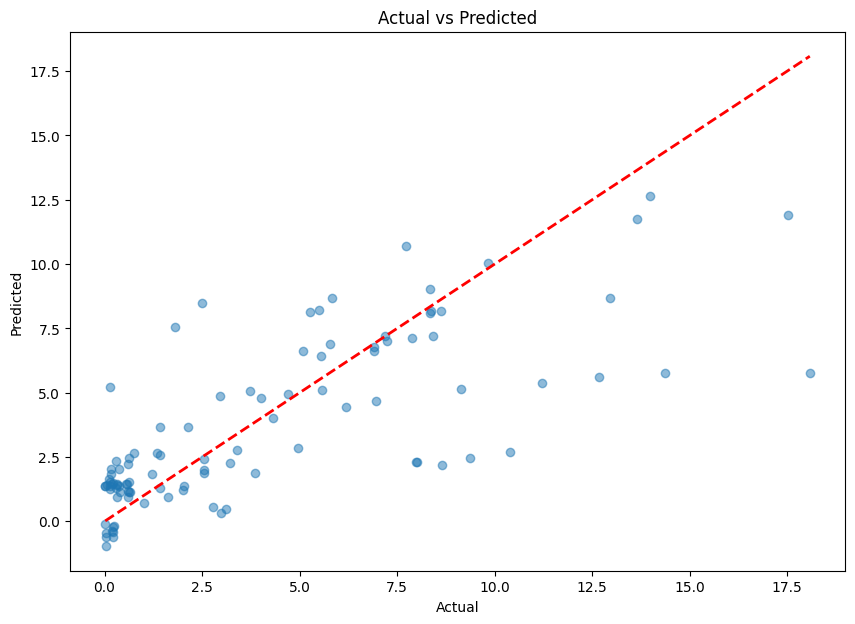

In [17]:
y_predict = lr.predict(X_test)
mse_lr = mean_squared_error(y_test,y_predict)
mae_lr = mean_absolute_error(y_test,y_predict)
r2_lr = r2_score(y_test,y_predict)

print(f"Mean Squared Error:",mse_lr)
print(f"Mean Absolute Error:",mae_lr)
print(f"R2 Score:",r2_lr)

plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 2. Linear Regression with L1 Regularization

In [18]:
lasso = GridSearchCV(Lasso(tol=0.1),{
    'alpha':[i for i in range(1,101)],
    'fit_intercept':[False,True],
    'copy_X':[False,True],
}, cv=5, return_train_score=False)
lasso.fit(X_train,y_train)
print("Cross Validation Score for Train",cross_val_score(lasso,X_train,y_train).mean())
print("Cross Validation Score for Test",cross_val_score(lasso,X_test,y_test).mean())

Cross Validation Score for Train -0.007275465413070048
Cross Validation Score for Test 0.002820442166901094


In [19]:
print("Best Parameters:", lasso.best_params_)
print("Best Score:", lasso.best_score_)

Best Parameters: {'alpha': 1, 'copy_X': False, 'fit_intercept': True}
Best Score: -0.007275465413070048


Mean Squared Error: 18.664964507969664
Mean Absolute Error: 3.5369339609795416
R2 Score: -0.0003987369902025417


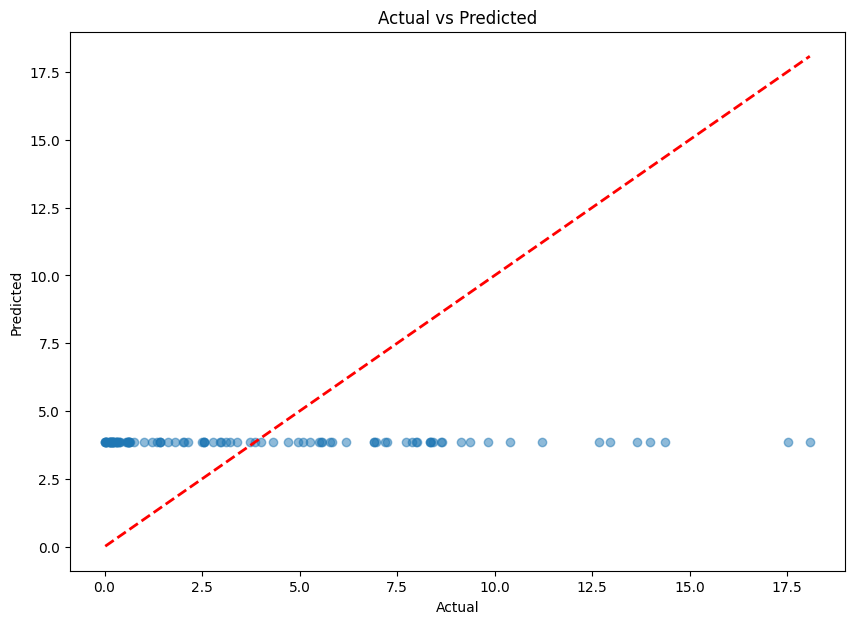

In [20]:
y_predict = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test,y_predict)
mae_lasso = mean_absolute_error(y_test,y_predict)
r2_lasso = r2_score(y_test,y_predict)

print(f"Mean Squared Error:",mse_lasso)
print(f"Mean Absolute Error:",mae_lasso)
print(f"R2 Score:",r2_lasso)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 3. Linear Regression with L2 Regularization

In [21]:
ridge = GridSearchCV(Ridge(tol=0.1),{
    'alpha':[i for i in range(1,101)],
    'fit_intercept':[False,True],
    'copy_X':[False,True],
}, cv=5, return_train_score=False)
ridge.fit(X_train,y_train)
print("Cross Validation Score for Train",cross_val_score(ridge,X_train,y_train).mean())
print("Cross Validation Score for Test",cross_val_score(ridge,X_test,y_test).mean())

Cross Validation Score for Train 0.5936393912687536
Cross Validation Score for Test 0.47413866163897433


In [22]:
print("Best Parameters:", ridge.best_params_)
print("Best Score:", ridge.best_score_)

Best Parameters: {'alpha': 1, 'copy_X': False, 'fit_intercept': True}
Best Score: 0.5936393912687538


Mean Squared Error: 17.42681187760096
Mean Absolute Error: 3.8750558318454016
R2 Score: 0.06596336764134192


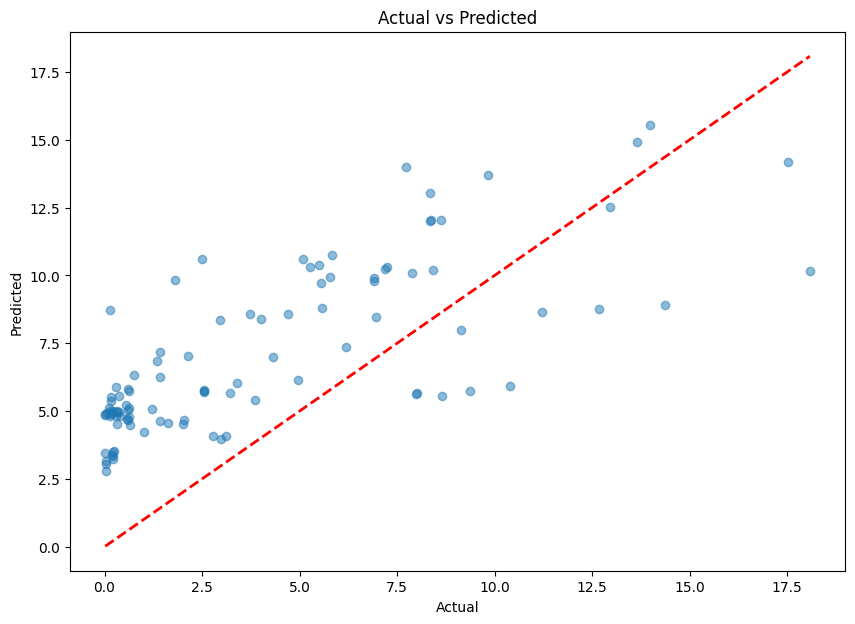

In [23]:
y_predict = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test,y_predict)
mae_ridge = mean_absolute_error(y_test,y_predict)
r2_ridge = r2_score(y_test,y_predict)

print(f"Mean Squared Error:",mse_ridge)
print(f"Mean Absolute Error:",mae_ridge)
print(f"R2 Score:",r2_ridge)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [24]:
X

array([[0.02857143, 0.47615332, 0.45471457, ..., 0.61384152, 0.01145783,
        0.02735109],
       [0.02857143, 0.47615332, 0.44890374, ..., 0.60757272, 0.08407549,
        0.02699424],
       [0.02857143, 0.47615332, 0.44311819, ..., 0.60130391, 0.17316914,
        0.02663895],
       ...,
       [0.74285714, 0.00076562, 0.00270758, ..., 0.01028084, 0.2024046 ,
        0.10146578],
       [0.74285714, 0.00076562, 0.00263846, ..., 0.01015547, 0.19698848,
        0.09911304],
       [0.74285714, 0.00076562, 0.00263846, ..., 0.01015547, 0.19156458,
        0.09911304]])

## 4. ElasticNet

In [25]:
elastic = ElasticNet(random_state=0)
elastic.fit(X_train,y_train)
elastic.score(X_test,y_test)

elastic = GridSearchCV(ElasticNet(random_state=0),{
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-4, 1e-3, 1e-2]}, cv=5, return_train_score=False)
elastic.fit(X_train,y_train)
cross_val_score(elastic,X_train,y_train).mean()
print("Cross Validation Score for Train",cross_val_score(elastic,X_train,y_train).mean())
print("Cross Validation Score for Test",cross_val_score(elastic,X_test,y_test).mean())

Cross Validation Score for Train 0.5883636000384541
Cross Validation Score for Test 0.4338728457390532


In [26]:
print("Best Parameters:", elastic.best_params_)
print("Best Score:", elastic.best_score_)

Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1000, 'tol': 0.0001}
Best Score: 0.5912102936909274


Mean Squared Error: 18.0017908926127
Mean Absolute Error: 3.950492608074308
R2 Score: 0.035145828172246873


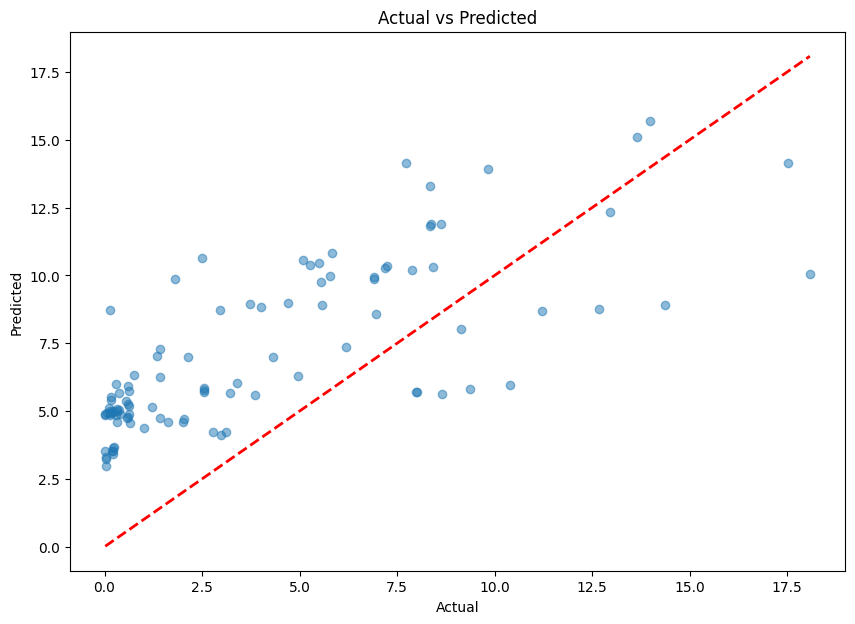

In [27]:
y_predict = elastic.predict(X_test)
mse_elastic = mean_squared_error(y_test,y_predict)
mae_elastic = mean_absolute_error(y_test,y_predict)
r2_elastic = r2_score(y_test,y_predict)

print(f"Mean Squared Error:",mse_elastic)
print(f"Mean Absolute Error:",mae_elastic)
print(f"R2 Score:",r2_elastic)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 5. Support Vector Regression

In [28]:
svr = GridSearchCV(SVR(),{
    'kernel':['linear','poly','rbf','sigmoid'],
    'gamma':['scale', 'auto'],
}, cv=5, return_train_score=False)
svr.fit(X_train,y_train)
cross_val_score(svr,X_train,y_train).mean()
print("Cross Validation Score for Train",cross_val_score(svr,X_train,y_train).mean())
print("Cross Validation Score for Test",cross_val_score(svr,X_test,y_test).mean())

Cross Validation Score for Train 0.6741246767906195
Cross Validation Score for Test 0.47339436683070896


In [29]:
print("Best Parameters:", svr.best_params_)
print("Best Score:", svr.best_score_)

Best Parameters: {'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.6741246767906195


Mean Squared Error: 17.336490414147587
Mean Absolute Error: 3.6743443889005687
R2 Score: 0.07080438825637081


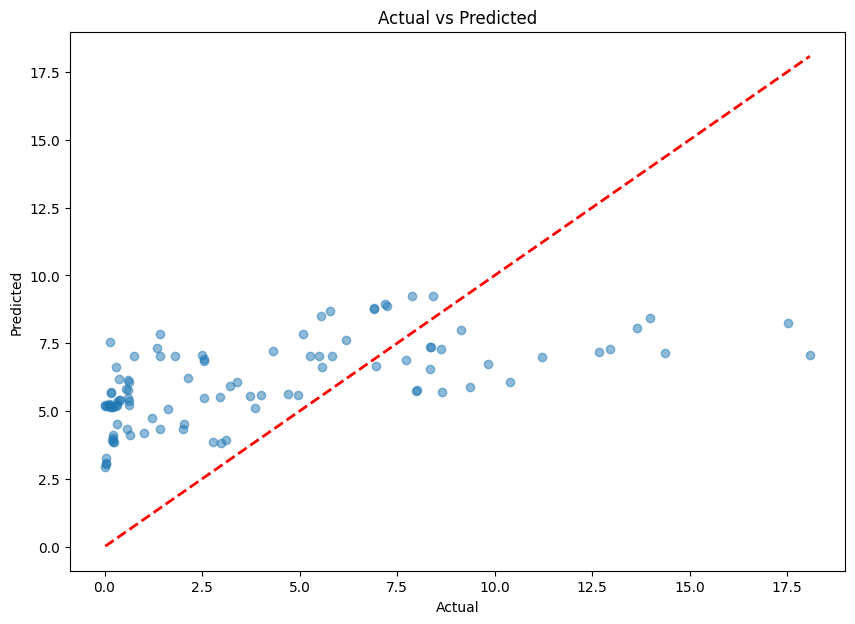

In [30]:
y_predict = svr.predict(X_test)
mse_svr = mean_squared_error(y_test,y_predict)
mae_svr = mean_absolute_error(y_test,y_predict)
r2_svr = r2_score(y_test,y_predict)

print(f"Mean Squared Error:",mse_svr)
print(f"Mean Absolute Error:",mae_svr)
print(f"R2 Score:",r2_svr)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 6. Random Forest Regressor

In [31]:
start = time.time()
rfr = GridSearchCV(RandomForestRegressor(),{
    'n_estimators':[i for i in range(100,1100,100)],
    'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    
}, cv=5, return_train_score=False)
rfr.fit(X_train,y_train)
print("Cross Validation Score for Train",cross_val_score(rfr,X_train,y_train).mean())
print("Cross Validation Score for Test",cross_val_score(rfr,X_test,y_test).mean())
print("Time Taken :",time.time()-start)

Cross Validation Score for Train 0.9316325352924553
Cross Validation Score for Test 0.649774742882687
Time Taken : 3236.6809878349304


In [32]:
print("Best Parameters:", rfr.best_params_)
print("Best Score:", rfr.best_score_)

Best Parameters: {'criterion': 'poisson', 'n_estimators': 1000}
Best Score: 0.9329700750101371


Mean Squared Error: 12.323582029384639
Mean Absolute Error: 2.6790664377421662
R2 Score: 0.3394846321766396


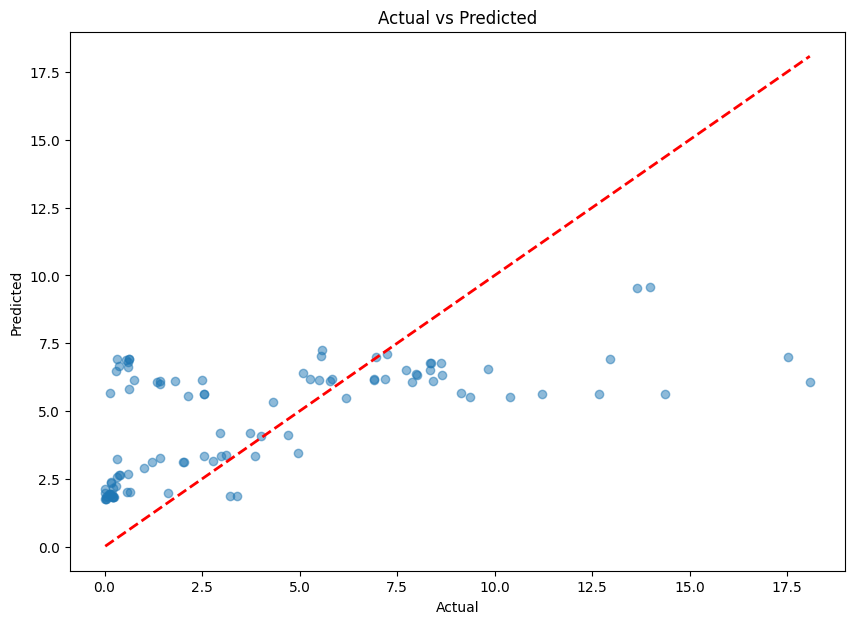

In [33]:
y_predict = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test,y_predict)
mae_rfr = mean_absolute_error(y_test,y_predict)
r2_rfr = r2_score(y_test,y_predict)

print(f"Mean Squared Error:",mse_rfr)
print(f"Mean Absolute Error:",mae_rfr)
print(f"R2 Score:",r2_rfr)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 7. XG Boost

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:07:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:07:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)


Test Score 0.11910018050551929
Mean Squared Error: 16.435410459841865
Mean Absolute Error: 3.262044541450412
R2 Score: 0.11910018050551929


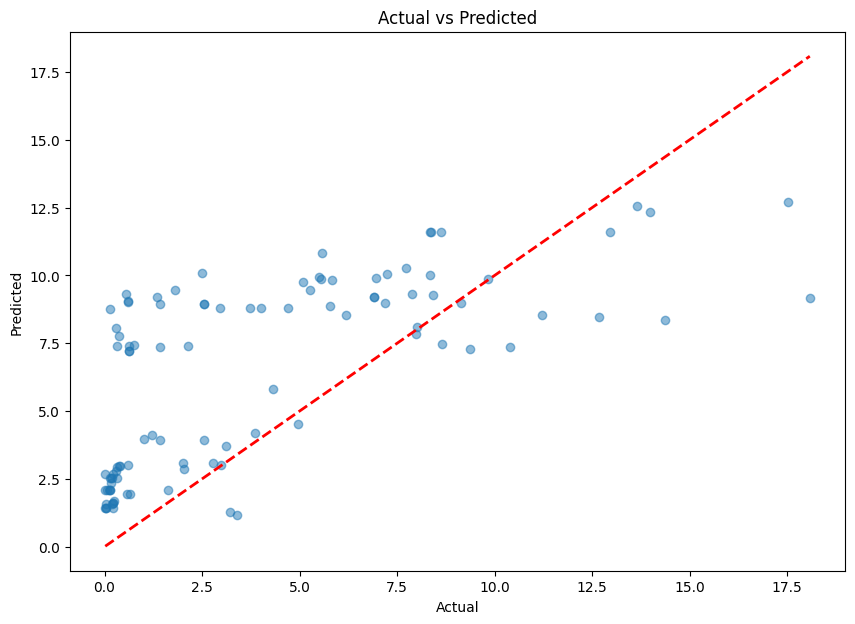

In [34]:
xgb_reg = xgb.XGBRegressor(objective="reg:linear", random_state=42,feature_selector='shuffle')
xgb_reg.fit(X_train, y_train)
# print("Cross Validation Score for Train",cross_val_score(xgb,X_train,y_train).mean())
# print("Cross Validation Score for Test",cross_val_score(xgb,X_test,y_test).mean())

print(f"Test Score",xgb_reg.score(X_test,y_test))

y_predict = xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test,y_predict)
mae_xgb = mean_absolute_error(y_test,y_predict)
r2_xgb = r2_score(y_test,y_predict)

print(f"Mean Squared Error:",mse_xgb)
print(f"Mean Absolute Error:",mae_xgb)
print(f"R2 Score:",r2_xgb)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 8. Long Short Term Memory RNN for Time Series Based Model Training
I will proceed to reattach the "Year" column and reshape X,y suitable for training LSTM

In [35]:
X = pd.concat([X,year],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
print("time: ",time.time()-start)

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
predictions = model.predict(X_test)

In [ ]:
# Assuming y_scaler is the scaler used for scaling y_train and y_test
y_scaler = MinMaxScaler()
y_scaler.fit_transform(y_train.reshape(-1, 1))

# Inverse transform the predictions
predictions = y_scaler.inverse_transform(predictions)
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
mse_lstm = mean_squared_error(y_test,predictions)
mae_lstm = mean_absolute_error(y_test,predictions)
r2_lstm = r2_score(y_test,predictions)

print(f"Mean Squared Error:",mse_lstm)
print(f"Mean Absolute Error:",mae_lstm)
print(f"R2 Score:",r2_lstm)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(y_test,predictions,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Model Evaluation

In [ ]:
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Elastic Net', 'Support Vector Regressor', 'Random Forest Regressor', 'XGABoost', 'LSTM']
mse_values = [mse_lr,mse_lasso,mse_ridge,mse_elastic,mse_svr,mse_rfr,mse_xgb,mse_lstm]
mae_values = [mae_lr,mae_lasso,mae_ridge,mae_elastic,mae_svr,mae_rfr,mae_xgb,mae_lstm]
r2_scores = [r2_lr,r2_lasso,r2_ridge,r2_elastic,r2_svr,r2_rfr,r2_xgb,r2_lstm]

positions = np.arange(len(model_names))
width = 0.25

plt.bar(positions, mse_values, width=width, label='MSE', align='center')
plt.bar(positions + width, mae_values, width=width, label='MAE', align='center')
plt.bar(positions + 2 * width, r2_scores, width=width, label='R² Score', align='center')

plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Comparison of ML Models')
plt.xticks(positions + width, model_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Exporting Trained Model

As we can See, XGABoost as outperformed all other models with Random Forest in the second place and 
So now Let's export out trained model to 

In [ ]:
df

In [ ]:
xgb_reg.predict([[0.02857142857142857,0.476153,0.437356,0.35559,0.231,0.821,0.156,0.026994]])

We have to map the values in State Names to their Actual Names

In [ ]:
# Check if both have same size
if len(df_State_codes) != len(df_States):
    raise ValueError("Both arrays must have the same length")
df_State_codes = np.unique(df_State_codes)
df_States = np.unique(df_States)

In [ ]:
mapping_dict = { df_States[i]: df_State_codes[i] for i in range(len(df_States))}
mapping_dict_zip = dict(zip(df_States, df_State_codes))

print(mapping_dict)
print(mapping_dict_zip)

In [ ]:
data_to_predict = [[mapping_dict_zip['Andhra Pradesh'],162975,98449661,7742,7.57,48.0,1095.7,604.0783004]]
scaled_new_data = scaler.transform(data_to_predict)

In [ ]:
scaled_new_data

In [ ]:
xgb_reg.predict(scaled_new_data)
# state_name, 

In [ ]:
import joblib
joblib.dump(xgb_reg,"XGBoost_Model.joblib")

In [ ]:
joblib.dump(xgb_reg,"XGBoost_Model.pkl")

In [ ]:
joblib.dump(scaler, 'min_max_scaler.joblib')

In [ ]:
joblib.dump(scaler, 'min_max_scaler.pkl')

In [ ]:
joblib.dump(mapping_dict_zip, 'mapping_dict.pkl')

In [ ]:
joblib.dump(mapping_dict_zip, 'mapping_dict.joblib')